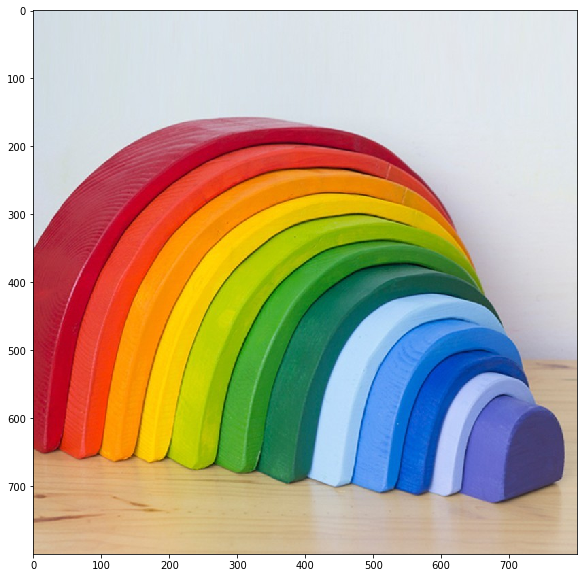

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from hist_3d import Hist3D

img_path = 'images/arcoiris.jpg'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (10,10))
plt.imshow(img_rgb)

In [16]:
sldr = lambda v, mi, ma, st: widgets.FloatSlider(
    value=v,
    min=mi,
    max=ma,
    step=st,
    continuous_update=False
)

In [19]:
%matplotlib inline
from ipywidgets import interact, widgets

hist3d_rgb = Hist3D(img_rgb, num_bins=32, color_space = 'rgb', num_pixels = 10000)
hist3d_hsv = Hist3D(img_rgb, num_bins=32, color_space = 'hsv', num_pixels = 10000)

def f(el, az):
    fig = plt.figure(figsize = (20,10))
    ax_rgb = fig.add_subplot(121, projection='3d')
    ax_hsv = fig.add_subplot(122, projection='3d')
    hist3d_rgb.plot(ax_rgb)
    hist3d_hsv.plot(ax_hsv)
    ax_rgb.view_init(el, az)
    ax_hsv.view_init(el, az)
    plt.show()

names = [
    ['el', [30, 0., 90, 10]],
    ['az', [30, 0, 360, 10]],
]

interact(f, **{s[0] : sldr(*s[1]) for s in names})


interactive(children=(FloatSlider(value=30.0, continuous_update=False, description='el', max=90.0, step=10.0),…

<function __main__.f(el, az)>

In [17]:
img = np.zeros((300,300,3), np.uint8)

def f(r, g, b):
    img[:] = [r,g,b]
    fig = plt.figure(figsize = (5,5))
    plt.imshow(img)

names = [
    ['r', [0, 0, 255, 1]],
    ['g', [0, 0, 255, 1]],
    ['b', [0, 0, 255, 1]]
]

interact(f, **{s[0] : sldr(*s[1]) for s in names})

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='r', max=255.0, step=1.0), F…

<function __main__.f(r, g, b)>

In [43]:
# Lee las imagenes
img1 = cv2.imread('images/pato_no_fail.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('images/pato_fail.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

def f(alpha):
    blend = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(blend)

interact(f, **{'alpha': sldr(0.0, 0.0, 1.0, 0.01)})

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='alpha', max=1.0, step=0.01)…

<function __main__.f(alpha)>

In [66]:
img = cv2.imread('images/pato.jpg', cv2.IMREAD_GRAYSCALE)


thres_t_dict = {'Truncado': cv2.THRESH_TRUNC,
                'Binario': cv2.THRESH_BINARY,
                'Binario Inv.': cv2.THRESH_BINARY_INV,
                'A Cero': cv2.THRESH_TOZERO,
                'A Cero Inv.': cv2.THRESH_TOZERO_INV}

def f(thres_t, Umbral):
    thres = Umbral
    
    _, thresh = cv2.threshold(img, thres, 255, thres_t_dict[thres_t])
    fig = plt.figure(figsize = (10,10))
    plt.imshow(thresh, cmap = 'gray', vmin = 0, vmax = 255)


button = widgets.ToggleButtons(
    options=['Truncado', 'Binario', 'Binario Inv.', 'A Cero', 'A Cero Inv.'],
    description='Tipo:'
)

interact(f, **{'thres_t': button, 'Umbral':sldr(128, 0, 255, 1)})

interactive(children=(ToggleButtons(description='Tipo:', options=('Truncado', 'Binario', 'Binario Inv.', 'A Ce…

<function __main__.f(thres_t, Umbral)>

In [71]:
img = cv2.imread('images/duckietown.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def f(filt_t, x):
    x = int(x)
    if filt_t == 'Promedio':
        blur = cv2.blur(img,(x,x))
    elif filt_t == 'Gaussiano':
        blur = cv2.GaussianBlur(img,(x,x), 0)
    elif filt_t == 'Mediano':
        blur = cv2.medianBlur(img, x)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(blur, vmin = 0, vmax = 255)


button = widgets.ToggleButtons(
    options=['Promedio', 'Gaussiano', 'Mediano'],
    description='Tipo de Filtro:'
)

interact(f, **{'filt_t': button, 'x':sldr(1, 1, 50, 2)})

interactive(children=(ToggleButtons(description='Tipo de Filtro:', options=('Promedio', 'Gaussiano', 'Mediano'…

<function __main__.f(filt_t, x)>